In [1]:
import numpy as np
import sympy as sp
import pickle
from IPython.display import HTML
import ipywidgets as widgets
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
mpl.rcParams['legend.fontsize'] = 10
import pandas as pd
import itertools
pd.set_option('display.max_colwidth', None)
from sympy.plotting import plot 
from IPython.display import Image


# Render to Latex function 
def RTL(e):
    latex_rendering = []

    for i in range(len(e)):
        latex_rendering.append("$" + sp.latex(e[i]) + "$ &nbsp;&nbsp;")
    
    return(HTML("".join(latex_rendering[0:])))

### Linear Algebra Notes II



- A more formal understanding of functions
- Vector transformations
- Linear transformation
- Matrix vector products as linear transformations
- Linear transformations as matrix vector products
- Image of a subset under a transformation
- Preimage of a set
- Preimage and kernal example 
- Sums and scalar multiples of linear transformations
- fix here
- Linear transformation examples: Scales and reflections
- Linear transformation examples: Rotations in R2
- Unit vectors
- Introduction to projections
- Expressing a projection on to a line as a matrix vector product
- Compositions of linear transformations
- Matrix Product examples

<hr/>

####  A more formal understanding of functions

<b>Note</b> that a a function can be defined as a mapping from one set to another: 

$$ f: X \rightarrow Y$$

<b>Note</b> that a function can also be intuited as a relationship between sets. For example, the set of all numbers in $\mathbb{R^2}$ and the set of all number in $\mathbb{R^3}$

<b>Note</b> that the function $f(x) = x^2$ could also be denoted as $ \mathbb{R} \rightarrow \mathbb{R}$. This signifies an association between $x$ and $x^2$, and could also be written as $ f:x \mapsto x^2$

<b>Note</b> that the set of possible inputs that a function maps <i>from</i> are defined as the <b>Domain</b>, and the set of possible outputs a functions maps <i>to</i> is defined as the <b>Codomain</b>

<b>Note</b> that the <b>Range</b> is defined as a subset of the codomain that an instance of a function maps to



<b>Note</b> that functions mappings can be denoted differently: 
 
 
$$g: \mathbb{R^2} \mapsto \mathbb{R} $$
 
$$ g(x_1, x_2) = 2 $$  

$$g: x_1, x_2 \mapsto 2 $$




<b>Note</b> that an $n \times n$ matrix that has all zero entries except those on the diagonal is defined as an <b> Identity Matrix</b>


$$ \displaystyle \left[\begin{matrix}1 & 0 & 0 & 0 & 0\\0 & 1 & 0 & 0 & 0\\0 & 0 & 1 & 0 & 0\\0 & 0 & 0 & 1 & 0\\0 & 0 & 0 & 0 & 1\end{matrix}\right] 
$$
    
    
 <b>Note</b> that this is often denoted as $I_n$, which is an $n \times n$ identity matrix

<b>Note</b> that, if  $I_n$ is multiplied by any vector of size $n$, the vector of size $n$ will be returned: 

$$I_n \vec{x} = \vec{x} \text{ for  } \vec{x} \in \mathbb{R^n}$$
 
<hr/>
 
 


#### Linear transformations as matrix vector products



<b>Note</b> that the columns of the identity vectors are defined a <b>standard basis</b> for $\mathbb{R^n}$. They both span $\mathbb{R^n}$ span and are linearly independent

<b>Note</b> that dfinitioin allows, where $e_1, e_2, e_3...e_n$ are are standard basis and $\vec{x}$ is a vector of size n, then it follows that 

$$ \vec{x} = x_1e_1 + x_2e_2 + x_3e_3...+ x_ne_1n$$

<b>Note</b> that this definition implies that, for the columns of an identity matrix denoted $[e_1, e_2....e_n]$ it must be the case that:  

$$T(\vec{x}) = T(x_1e_1 + x_2e_2 + x_3e_3...+ x_ne_1n) $$

<b>Note</b> that, using the law of association it is possible rewrite this as: 

$$  x_1 T ( \vec{e_1}) + x_2 T ( \vec{e_2}) ... + x_n T ( \vec{e_n})  $$ 
    
    

<b>Note</b> that allows how the identity matrix must be scaled when describing a matrix

<hr/>

#### Vector transformations

<b>Note</b> that vectors can be regarded as members of sets. For example: 

$$\vec{x} \in \mathbb{R^n} $$

where $\mathbb{R^n}$ is set of all n-tuples (or vectors denoted as lists)

<b>Note</b> that aa set of vectors, can be denoted as $ \mathbb{R^n} $ where $n$ is the number of components in each vector in the set. For example:  

$$f: \mathbb{R^n} \mapsto \mathbb{R^m}$$

<b>Note</b> that a <b>Linear Transformation</b> can be defined as a function that operates on different sets of vectors: 

$$T: \mathbb{R^3} \mapsto \mathbb{R^2} $$

<b>Note</b> that transformation is undertaken by using and identity matrix of the same dimensions of the domain, and creating a matrix that this can multiplied to 

where $T$ is a functin that takes 3 inputs $T(x, y, z)$

<b>Example</b>: <i>Represent the following transformation from $\mathbb{R^2}$ to $\mathbb{R_3}$ as a matrix vector product of an identity matrix and some other vector for the function $ T(v_1, v_2) = (v2, v_1 + v_2,v_1 - v_2)$ </i>

In [2]:
# Let v1, v2 be variables
v1, v2 = sp.symbols('v1, v2')

In [3]:
# Let E1 be a standard basis vector in R2
E1 = sp.eye(2)
E1

Matrix([
[1, 0],
[0, 1]])

In [4]:
# Let E2 be a transformation vector
E2 = sp.Matrix([[0, v2], [v1,  v2], [v1, -v2]])
E2

Matrix([
[ 0,  v2],
[v1,  v2],
[v1, -v2]])

In [5]:
# Let E3 and E4 be the transformation applied to the identity matrix
E3 = E2 * E1.col(0)
E4 = E2 * E1.col(1)
RTL([E3, E4])

In [6]:
# Let E5 be the tranformation matrix in R3
E5 = sp.Matrix([list(E3), list(E4)]).T
E5

Matrix([
[ 0,  v2],
[v1,  v2],
[v1, -v2]])

<b>Example</b>: <i>Represent the following transformation from $\mathbb{R^3}$ to $\mathbb{R^2}$ as a matrix vector product of an identity matrix and some other vector for the function $ T(v_1, v_2) = (v_1 + v_3, 2v_2 - v_3)$ </i>

In [7]:
# Let v1, v2 be variables
v1, v2, v3 = sp.symbols('v1, v2, v3')

In [8]:
# Let E1 be an identity matrix in R3
E1 = sp.eye(3)
E1

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

In [9]:
# Let E2 be a transformation matrix
E2 = sp.Matrix([[v1, 0, v3], [0, 2 * v2, -v3]])
E2

Matrix([
[v1,    0,  v3],
[ 0, 2*v2, -v3]])

In [10]:
# Let E3, E4, E5 be the transformation applied to the identity matrix
E3 = E2 * E1.col(0)
E4 = E2 * E1.col(1)
E5 = E2 * E1.col(2)
RTL([E3, E4, E5])

In [11]:
# Let E6 be the tranformation matrix in R3
E6 = sp.Matrix([list(E3), list(E4), list(E5)]).T
E6

Matrix([
[v1,    0,  v3],
[ 0, 2*v2, -v3]])

#### Linear transformation

<b>Note</b> that any linear transformation, $T: R^m \mapsto R^n$ where $\vec{a}, \vec{b} \in \mathbb{R^n}$, by definition, must have the following properties:

$$T(\vec{a} + \vec{b}) = T(\vec{a}) + T(\vec{b}) $$

$$T(c\vec{a} + \vec{b}) = c T(\vec{a}) $$

<hr/>

#### Matrix vector products as linear transformations

<b>Note</b> that, by definition, a vector product can be regarded as a linear transformation and the above propertties can b alebraically proved.

<hr/>

<b>Example</b>: <i>Represent the following transformation from $\mathbb{R^2}$ to $\mathbb{R^3}$ as a matrix vector product of an identity matrix and some other vector for the function $ T(x_1, x2) = (x_1 + 3x_2, 5x2 - x1, 4x_1 + x2)$ </i>

In [12]:
# let x1, x2 be variables
x1, x2 = sp.symbols('x1, x2')

In [13]:
# Let E1 be an identity matrix in R3
E1 = sp.eye(2)
E1

Matrix([
[1, 0],
[0, 1]])

In [14]:
# Let E2 be a transformation matrix
E2 = sp.Matrix([[x1,  3 * x2],
               [ -x1, 5 * x2 ],
               [4 * x1,  - x2]])
E2

Matrix([
[  x1, 3*x2],
[ -x1, 5*x2],
[4*x1,  -x2]])

In [15]:
# Let E3, E4, E5 be the transformation applied to the identity matrix
E3 = E2 * E1.col(0)
E4 = E2 * E1.col(1)
RTL([E3, E4])

In [16]:
# Let E5 be the tranformation matrix in R3
E5 = sp.Matrix([list(E3), list(E4)]).T
E5

Matrix([
[  x1, 3*x2],
[ -x1, 5*x2],
[4*x1,  -x2]])

#### Image of a subset under a transformation


<b>Note</b> that vectors can be visualised on a cartesian plane


In [20]:
# Let X0, X1 X2 be vectors
X0 = sp.Matrix([-2, -2])
X1 = sp.Matrix([-2, 2])
X2 = sp.Matrix([2, -2])

RTL([X0, X1, X2])

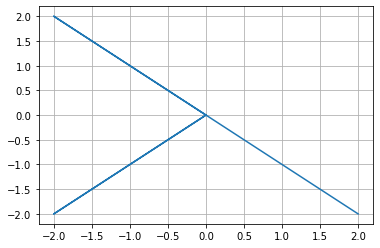

In [21]:
x = [0, -2, 0, -2, 0, 2]
y = [0, -2, 0, 2, 0, -2]

plt.plot(x, y)
plt.grid()

<br/>

<b>Note</b> that if a line, $L_0$, is the interval between $X1$ and $X2$, $L_0$ can be denoted as a parametrisation of a line: 


$$ L_0 = \{ \vec{x_0} + t(\vec{x_1} - \vec{x_0}) \text{ | } 0 \le t \le 1  \}$$

<b>Note</b> that similiarly, it must be the case that: 

$$ L_1 = \{ \vec{x_1} + t(\vec{x_2} - \vec{x_1}) \text{ | }  0 \le t \le 1  \}$$

$$ L_2 = \{ \vec{x_2} + t(\vec{x_0} - \vec{x_2}) \text{ | }  0 \le t \le 1  \}$$

<b>Note</b> that $ S = \{ L_0, L_1, L_2 \} $ is a union that can be defined as a triangle

So what happens to the set when we take a linear transformation T of this hole unioin

<b>Note</b> that is is possible to Transform this union ov vectors using, for example, the transformation $T\vec{x}$ = $\left[\begin{matrix}1 & -1\\2 & 0\end{matrix}\right]$


<b>Note</b> that the transformation is possible via algebraic manipulation where

$$ T(L_0) = \{ T (\vec{x_0} + t(\vec{x_1} - \vec{x_0})) \text{ | }  0 \le t \le 1  \}  $$

is equivalent to: 

$$ T(L_0) = \{ T(\vec{x_o}) - t(T(\vec{x_1}) - T(\vec{x_0})) \}$$

<b>Note</b> that this means it is possible to transform list of points that represent polygon

<b>Example</b>: <i>Show that the above formula is valid and that the transformation can be applied to a union of vectors </i>

In [22]:
# LetL0, x0, t, x1, T be variables
L0, x0, t, x1, T = sp.symbols('L0, x0, t, x1, T')

In [23]:
# Let E2 be line between X0 and X1
E2 = sp.Eq(L0, x0 + t * (x1 - x0) )
E2

Eq(L0, t*(-x0 + x1) + x0)

In [24]:
# Let E3 be a transformation applied to E2
E3 = sp.Eq(E2.lhs * T, E2.rhs * T )
E4 = E3.expand()
E4

Eq(L0*T, -T*t*x0 + T*t*x1 + T*x0)

In [25]:
# Let E5 be an algebraic manipulatin of E4
E5 = sp.Eq(E4.lhs, E4.rhs.collect(t))
E5

Eq(L0*T, T*x0 + t*(-T*x0 + T*x1))

In [26]:
# Using the forumul a
E6 = sp.Matrix([[1, -1], [2, 0]])
E6

Matrix([
[1, -1],
[2,  0]])

In [27]:
# Let E7, E8 and E9 be 

E7 = E6 * X0 + t *  (-E6 * X0 + E6 * X0)
E8 = E6 * X1 + t *  (-E6 * X1 + E6 * X1)
E9 = E6 * X2 + t *  (-E6 * X2 + E6 * X2)

RTL([E7, E8, E9])

#### Preimage of a set


<b>Recall </b> that $T: X \mapsto Y$  can denote a transformation between a domain and codomain, or an association of any member rom the set $X$ to the set $Y$

<b>Note</b> that $T(A)$ can be defined as the image of A under T, which means the set all members of subset A, or all possible transformations. This can be denoted as: 

 $$\{T(\vec{x}) \subseteq Y \text{ | } \vec{x} \in A \} $$

<b>Note</b> that this implis that the set of all trasnformations is defined as the <b>image</b> of $A$ under $T$

<b>Note</b> that it is, alternatively, possible to consider some set $S$ in $Y$ and seek to determine the subset of the domain that maps into $S$, denoted as: 

$$ \{ \vec{x} \in X \text{ | } T(\vec{x} \in S \} $$


<b>Note</b> that the set of domain that can be mapped into $S$ is defined as the <b>preimaage</b> of S and denoted as $T^{-1}S$, called the preimage of $S$ under $T$: 

$$T(T^{-1}(S))$$
 
<b>Note</b> that the preimage of the preimage can be defined as:

$$T(T^{-1}(S)) \subseteq S$$


<hr/>

#### Preimage and kernal example

<b>Example</b>: <i> If $T$ is a the transformation from $\mathbb{R^2}$ to $\mathbb{R^2}$, with a transfromation vectors ($x_1 + 3x_2, 2x_1 + 6x_2$) find the set of vectors in the preimage that will map toeitehr $ \displaystyle \left[\begin{matrix}0\\0\end{matrix}\right] $ or $\displaystyle \left[\begin{matrix}1\\2\end{matrix}\right]$

In [28]:
# let x1, x2 be variables
x1, x2, t = sp.symbols('x1, x2, t')

In [29]:
# Let E1 be a identity matrix of the codomain
E1 = sp.eye(2)
E1

Matrix([
[1, 0],
[0, 1]])

In [30]:
# Let E2 be a Transformation matrix (a scaled identity matrix)
E2 = sp.Matrix([[1 * x1, 3 * x2],
               [2 * x1, 6 * x2]])
E2

Matrix([
[  x1, 3*x2],
[2*x1, 6*x2]])

In [31]:
# Let E3, E4, E5 be the transformation applied to the identity matrix
E3 = E2 * E1.col(0)
E4 = E2 * E1.col(1)
RTL([E3, E4])

In [32]:
# Let E5 be the tranformation matrix in R3
E5 = sp.Matrix([list(E3), list(E4)]).T
E5

Matrix([
[  x1, 3*x2],
[2*x1, 6*x2]])

<b>Note</b> that this examples asks for a subset of $T^1(S) = \text{ preimage of s under T } $
 
denoted as: 
 
 $$ \{ \vec{x} \in \mathbb{R^2} \text{ | } T(\vec{x}) \in S \} $$
 
or more explicitly:

 $$ \{ \vec{x} \in \mathbb{R^2} \text{ | } A\vec{x} = \left[\begin{matrix}0\\0\end{matrix}\right] \text{ or }  A\vec{x} = \left[\begin{matrix}1\\2\end{matrix}\right] \in S \} $$


In [43]:
E6 = sp.Matrix([sum(E5.row(0)), sum(E5.row(1))])
E6

Matrix([
[  x1 + 3*x2],
[2*x1 + 6*x2]])

In [45]:
E7 = sp.solve(E6, (x1, x2))
E7

{x1: -3*x2}

In [47]:
E8 = sp.Matrix([sum(E5.row(0)) - 1, sum(E5.row(1)) - 2])
E8

Matrix([
[  x1 + 3*x2 - 1],
[2*x1 + 6*x2 - 2]])

In [48]:
E9 = sp.solve(E8, (x1, x2))
E9

{x1: 1 - 3*x2}

In [52]:
# Note x2 is free variable, so set to t
E10  = sp.Eq(x1, E7[x1].subs({x2: t}))
E10

Eq(x1, -3*t)

In [54]:
# Note x2 is free variable, so set to t
E11  = sp.Eq(x1, E9[x1].subs({x2: t}))
E11

Eq(x1, 1 - 3*t)

In [55]:
# now write solution set as vector noations
E12 = sp.Eq(sp.Matrix([x1, x2]), t * sp.Matrix([-3, 1]))
E12

Eq(Matrix([
[x1],
[x2]]), Matrix([
[-3*t],
[   t]]))

In [56]:
E13 = sp.Eq(sp.Matrix([x1, x2]), t * sp.Matrix([-2, 1]))
E13

Eq(Matrix([
[x1],
[x2]]), Matrix([
[-2*t],
[   t]]))

#### Linear transformation examples: Scales and reflections


<b>Recall</b> the linear transformation:  

$$ T: \mathbb{R^n} \mapsto \mathbb{R^m}  $$

can be represented as:

$$ T(\vec{x}) = A \vec{x} $$ 

where $A$ is an $m \times n $ matrix

A then becomes transformation on each of the columns

<b>Example </b>: <i>Reflect and scale the vectors $ \left[\begin{matrix}3\\2\end{matrix}\right] $, $ \left[\begin{matrix}-3\\2\end{matrix}\right] $ and $ \left[\begin{matrix}3\\-2\end{matrix}\right] $ across the $Y$ axis and scaled on the $Y$ axis by a factor of 2

In [57]:
# Let E1, E2 and E3 be matrices
E1 = sp.Matrix([3,2])
E2 = sp.Matrix([-3, 2])
E3 = sp.Matrix([3, -2])

RTL([E1, E2, E3])

In [58]:
# Note that these vectors can be plotted using a custom function
def PlotVectors(vectors = [], plotPointsAsShape = False, plotFromStandardPosition = False):

    plt.scatter(0, 0)
    plt.grid()
    
    xValues = [vectors[i][0] for i in range(len(vectors))]
    yValues = [vectors[i][1] for i in range(len(vectors))]
    
    plt.scatter(xValues, yValues)
    
    
    if plotPointsAsShape:
        xValues.append(xValues[0])
        yValues.append(yValues[0])

        plt.plot(xValues, yValues)
    
    if plotFromStandardPosition:
        for i in range(len(xValues)):
            plt.plot([0, xValues[i]], [0,  yValues[i]])


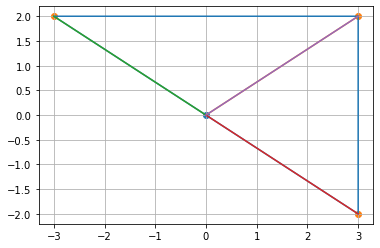

In [59]:
PlotVectors([E1, E2, E3], plotPointsAsShape=True, plotFromStandardPosition=True)

In [61]:
# Let E4 be an identity matrix based on dimensions in the domain
E4 = sp.eye(2)
E4

Matrix([
[1, 0],
[0, 1]])

In [62]:
# Let E5 be a transformation matrix

E5 = E4.col(0) * -1
E6 = E4.col(1) * 2
E7 = sp.Matrix([list(E5), list(E6)])
E7

Matrix([
[-1, 0],
[ 0, 2]])

In [63]:
# Note that a function can be created to transform vectors through a transformation matrix
def ApplyTransformationViaScaledIdentityMatrix(scaledIdentityMatrix, vectors):
    transformedVectors = []
    for i in vectors: 
        t = scaledIdentityMatrix * i
        transformedVectors.append(t)
        
    return(transformedVectors)

In [65]:
# Let E8 be the transformed vectors
E8 = ApplyTransformationViaScaledIdentityMatrix(E7, [E1, E2, E3])
RTL(E8)

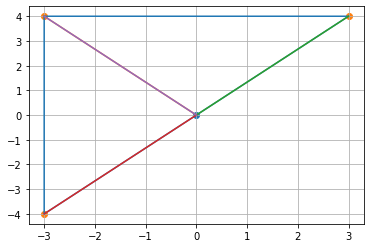

In [66]:
# Plot the transformed points
PlotVectors(E8, plotPointsAsShape=True, plotFromStandardPosition=True)

#### Linear transformation examples: Rotations in R2

Note that rotation can be regarded as linear transformation

$$ Rot_\theta (\vec{x}): \mathbb{R^2} \mapsto \mathbb{R^2} $$


which means 

$$ Rot_\theta (\vec{x}) = A_{(2 x 2)} \vec{x}$$

question - how to find A - need to start with identity, 


$$ A = [Rot_\theta \left[\begin{matrix}1\\0\end{matrix}\right]   Rot_\theta \left[\begin{matrix}0\\1\end{matrix}\right]] $$

In [350]:
theta = sp.symbols('theta')
E1 = sp.eye(2) 
E1

Matrix([
[1, 0],
[0, 1]])

In [351]:
# Just perform transformation on each colums
# how does

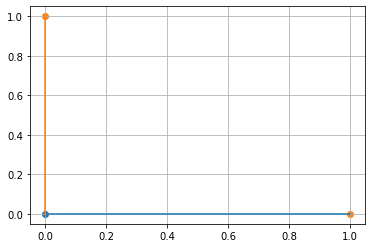

In [352]:
PlotVectors([E1.col(0), E1.col(1)], plotFromStandardPosition=True)

In [355]:
# note that totration in counter closckwhite will be cosine theta

E2 = sp.Matrix([sp.cos(theta), sp.sin(theta)])
E2

Matrix([
[cos(theta)],
[sin(theta)]])

In [356]:
E3 = sp.Matrix([- sp.sin(theta), sp.cos(theta)])
E3

Matrix([
[-sin(theta)],
[ cos(theta)]])

In [372]:
E4 = sp.Matrix([list(E2), list(E3)]).T
E4

Matrix([
[cos(theta), -sin(theta)],
[sin(theta),  cos(theta)]])

In [386]:
# apply to any x1 x2 matrix, from there
E5 = E4.subs({theta: 45})

In [387]:
E6 = E5 * sp.Matrix([1,0])

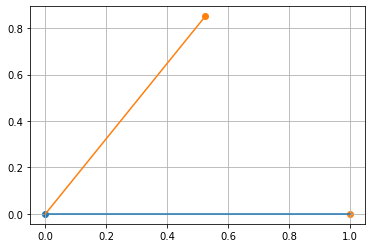

In [388]:
PlotVectors([E1.col(0), E6], plotFromStandardPosition=True)

#### Unit vectors

Is a vectors of length 1

PUT IN FORMULA.....as per below

<hr/>

In [390]:
E1 = sp.Matrix([4,5,6,7])
E1

Matrix([
[4],
[5],
[6],
[7]])

In [392]:
E2 = (1 / E1.norm()) * E1
E2

Matrix([
[2*sqrt(14)/21],
[5*sqrt(14)/42],
[   sqrt(14)/7],
[   sqrt(14)/6]])

#### Introduction to projections

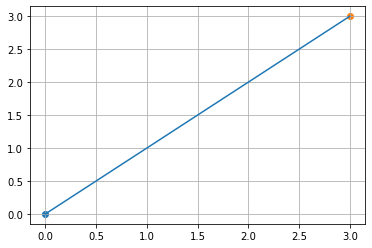

In [395]:
# consider line
PlotVectors([sp.Matrix([3, 3])], plotFromStandardPosition=True)


Note that a line is all scalar multiples of some vector

Note that if this line $L$, $L = \{ c\vec{v} \text{ | } c \in \mathbb{R} \} $


Now consider another vector

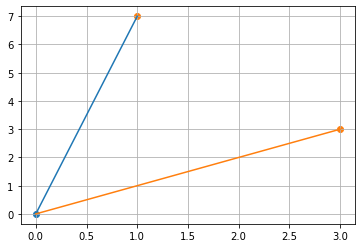

In [397]:
PlotVectors([sp.Matrix([1, 7]), sp.Matrix([3, 3]) ], plotFromStandardPosition=True)

Ide aof os that light shines down onto blue inewhich is perpendicular to orange - idea of shadow on blue line to organe. 

How much does one line run the direction of another. Note that if we get a vector that is orthogonal and contains 

so what the part of orange vector above that goes from 0, 0 to a point that is orthognal to organse and meets blue

L - is oragne

So 

$$ Proj_L (\vec{x}) = \text{ some vector in L where } \vec{x} - Proj_L(\vec{x}) \text { is orthogonal to L } $$


Note that from the above def of line and $c \vec{v} $, we can rewrite this projection vector and some scaled $L$

$$ P = c\vec{v} $$

and if x is other vector, then it must be true that

$$ (\vec{x} - c \vec{v}) \cdot \vec{v} = 0 $$

now, via algebraic manipualtion it can be shown that: 

$$ c = \frac{\vec{x} \cdot \vec{v}} {\vec{v} \cdot \vec{v}} $$

This means that the project, $ c \vec{v} $ becomes


$$ Proj_L (\vec{x})  = \frac{\vec{x} \cdot \vec{v}} {\vec{v} \cdot \vec{v}} \vec{v} $$


In [400]:
# #Example
# Let E1 be a line (all scalar multiples)
E1 = sp.Matrix([2, 1])
E1

Matrix([
[2],
[1]])

In [407]:
E2 = sp.Matrix([2, 3])
E2

Matrix([
[2],
[3]])

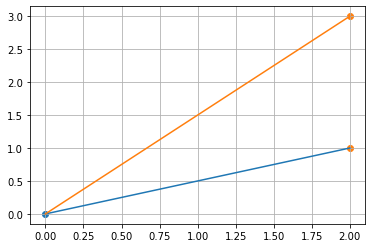

In [408]:
PlotVectors([E1, E2], plotFromStandardPosition=True)

In [415]:
E3 = (E2.dot(E1) / E1.dot(E1)) * E1
E3
# ROUNDING PLOT ISSUE

Matrix([
[14/5],
[ 7/5]])

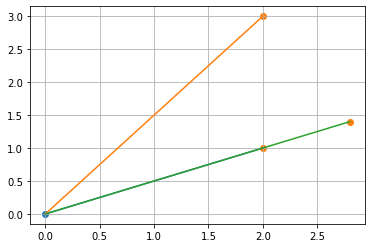

In [419]:
PlotVectors([E1, E2, E3], plotFromStandardPosition=True)

In [418]:
E3 = sp.Matrix([2.8, 1.4])

#### Expressing a projection on to a line as a matrix vector product

Recall Note that if this line $L$, $L = \{ c\vec{v} \text{ | } c \in \mathbb{R} \} $ and projects possible


$$ c = \frac{\vec{x} \cdot \vec{v}} {\vec{v} \cdot \vec{v}} \vec{v} $$


Note that because it is the case that $\vec{x} \cdot \vec{x} = ||x||^2 $ the above can be rewritten as 


$$ c = \frac{\vec{x} \cdot \vec{v}} {||v||^2} \vec{v} $$


Note that it would be convenient is length of v is 1, or v is a unit vector, then formula will simplify to: 

$$ (\vec{x} \cdot \vec{v}) \vec{v} $$

So, given a vector that is not unit vector - you can normalise v first

so let $\vec{u} = \frac{1}{||\vec{v}||} \vec{v} $


so line $L$ could be redeninfed  $L = \{ c\vec{u} \text{ | } c \in \mathbb{R} \} $ then projection is simplifed to 

$$ Proj_L (\vec{x})  = (\vec{x} \cdot \vec{u})  \hat{u} $$


Note that this meets conditions for linear transformation

In [420]:
# Example - for some vbector V, find a, how to find some transfomration for the projection on the line defined by v?

In [421]:
E1 = sp.Matrix([2,1])

In [428]:
# convert to U
E2 = (1 / E1.norm()) * E1
E2

Matrix([
[2*sqrt(5)/5],
[  sqrt(5)/5]])

In [429]:
E3 = sp.eye(2)
E3

Matrix([
[1, 0],
[0, 1]])

JG _ THIS IS KEY EXAMPLE - operating on each of the unit column vectors

Note that we are applying transforation to each column of the identity matrix in the domain 

$$ \left[\begin{matrix}1\\0\end{matrix}\right] (\vec{x} \cdot \vec{u})  \hat{u} $$

and 


$$ \left[\begin{matrix}0\\1\end{matrix}\right] (\vec{x} \cdot \vec{u})  \hat{u} $$


In [446]:
E4 = E3.col(0)
E5 = E3.col(1)
RTL([E4, E5])

In [447]:
E6 = E4.dot(E2) * E2
E6

Matrix([
[4/5],
[2/5]])

In [448]:
E7 = E5.dot(E2) * E2
E7

Matrix([
[2/5],
[1/5]])

In [451]:
E8 = sp.Matrix([list(E6), list(E7)])
E8

Matrix([
[4/5, 2/5],
[2/5, 1/5]])

In [452]:
# vector and take any multiply by this matrix

In [453]:
E9 = sp.Matrix([5,6])
E9

Matrix([
[5],
[6]])

In [457]:
E10 = E8 * E9
E10

Matrix([
[32/5],
[16/5]])

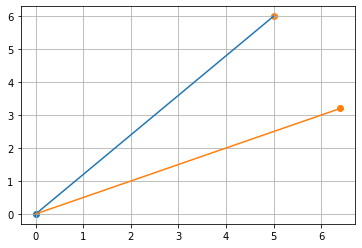

In [459]:
PlotVectors([E9, E10], plotFromStandardPosition=True)

#### Compositions of linear transformations

Consider $S: X \mapsto Y $ if $ x \in \mathbb{R^n}$ and $Y \in \mathbb{R^m} $

Note that linear transfomration alllws $S(\vec{x}) = A\vec{x} $ for some matrix A that has been constructed from the identity matrix

Matrix A will need to have M x N shape to be compativle with x

consider Consider $T: Y \mapsto Z $ if $ y \in \mathbb{R^m}$ and $Y \in \mathbb{R^l} $


$S(\vec{x}) = B\vec{x} $ 

B will have m x l shape


it is possible to create a mapping from S to T? - composition


$ T \circ S : X \mapsto Z $    

This the composition of T with S


A way to do this is apply transformation one after another 

Definitn $ T \circ S: T(S(\vec{x})) $

Note this this can be proved algebraically to be a linear transformation


End up beeing   $ T \circ S (\vec{x}) =  B(A\vec{x}) = C \vec{x} $


$c = \left[ B(A \displaystyle \left[\begin{matrix}1\\0\\0\\0\\0\end{matrix}\right] )   B(A \displaystyle \left[\begin{matrix}0\\1\\0\\0\\0\end{matrix}\right] )... \right]$


We can also use product matrix


Note this also means A

<hr/>

#### Matrix Product examples

consider Matrix A which m x n and matrix B which is n x k

Note that AB (cols of A must be same as rows of B to be well defined) and is equal

$$AB = \left[ A \vec{b_1} A \vec{b_2}... A \vec{b_k}    \right] $$

This comes from compositon of A and B

In [465]:
E1 = sp.Matrix([[1, -1, 2],
               [0, -2, 1]])

E1
# this is 2 dim space, 

Matrix([
[1, -1, 2],
[0, -2, 1]])

In [469]:
E1.shape

(2, 3)

In [472]:
E2 = sp.Matrix([[1, 0, 1, 1],
               [2, 0, 1, -1],
               [3, 1, 0, 2]])
E2
# this is 4 d space

Matrix([
[1, 0, 1,  1],
[2, 0, 1, -1],
[3, 1, 0,  2]])

In [473]:
E2.shape

(3, 4)

In [475]:
E3 = E1 * E2
E3

Matrix([
[ 5, 2,  0, 6],
[-1, 1, -2, 4]])

Note that transofmration can be inuited here as: 
THIS IS MATRIX (ABOVE) of composition of E1 and E2

E1(E2(x)) - 